# BATTERY RUL PREDICITON AND CHARGING TIME PREDICTION


### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### load the dataset

In [2]:
data = pd.read_csv('Battery_RUL.csv')

In [3]:
data.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Current(A),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


In [4]:
data.head()
data = data[:500]

In [5]:
data

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Current(A),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107
...,...,...,...,...,...,...,...,...,...
495,517,1623.88,467.571429,3.941,3.553,3182.383,4040.38,8070.71,596
496,518,1621.17,466.000000,3.940,3.552,3176.359,4040.36,8069.28,595
497,519,1618.84,463.285714,3.940,3.552,3170.312,4040.31,8100.16,594
498,520,1615.81,462.000000,3.940,3.552,3158.266,4040.27,8078.75,593


### Data Exploration

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                500 non-null    int64  
 1   Discharge Time (s)         500 non-null    float64
 2   Decrement 3.6-3.4V (s)     500 non-null    float64
 3   Max. Voltage Dischar. (V)  500 non-null    float64
 4   Current(A)                 500 non-null    float64
 5   Time at 4.15V (s)          500 non-null    float64
 6   Time constant current (s)  500 non-null    float64
 7   Charging time (s)          500 non-null    float64
 8   RUL                        500 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [7]:
#handling missing data
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                500 non-null    int64  
 1   Discharge Time (s)         500 non-null    float64
 2   Decrement 3.6-3.4V (s)     500 non-null    float64
 3   Max. Voltage Dischar. (V)  500 non-null    float64
 4   Current(A)                 500 non-null    float64
 5   Time at 4.15V (s)          500 non-null    float64
 6   Time constant current (s)  500 non-null    float64
 7   Charging time (s)          500 non-null    float64
 8   RUL                        500 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 39.1 KB


In [8]:
data.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Current(A),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,256.958000,5835.67964,2394.449429,3.989924,3.479660,5243.084139,7684.60850,11077.062240,856.042000
std,150.924314,33427.86954,19018.577795,0.054626,0.096944,11500.526135,28283.46639,27986.864924,150.924314
min,1.000000,168.00000,-64192.716000,3.670000,3.086000,269.984000,1124.35000,5277.630000,592.000000
25%,127.750000,1795.07000,550.750000,3.967000,3.429000,3724.004083,4652.19000,8358.465000,719.750000
50%,252.500000,1946.16000,637.800000,3.984000,3.473000,4203.543500,5156.31000,8601.620000,860.500000
75%,393.250000,2101.43250,738.596750,4.001000,3.517000,4711.720250,5660.36000,8848.100000,985.250000
max,521.000000,435251.49000,263086.078000,4.290000,4.053000,219923.996000,443700.02000,443700.020000,1112.000000


In [9]:
data.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Current(A),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


# Splitting the dataset for train and test

In [10]:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

In [11]:
# X = data.iloc[:,:-2]
# y = data.iloc[:,-1]
X = data.drop(columns=['Charging time (s)','RUL'])
y = data[['Charging time (s)','RUL']]

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [16]:
# Function to train, test and evaluate a model for multi-output regression
def evaluate_model_multioutput(model, X_train, Y_train, X_test, Y_test, model_name):
    model.fit(X_train, Y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics for each output dimension
    train_mse = mean_squared_error(Y_train, y_train_pred, multioutput='raw_values')  # Array of MSE for each output
    test_mse = mean_squared_error(Y_test, y_test_pred, multioutput='raw_values')      # Array of MSE for each output
    train_r2 = r2_score(Y_train, y_train_pred, multioutput='raw_values')              # Array of R^2 for each output
    test_r2 = r2_score(Y_test, y_test_pred, multioutput='raw_values')                 # Array of R^2 for each output
    
    # Storing the results per model
    results[model_name] = {
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Train R^2': train_r2,
        'Test R^2': test_r2
    }

In [17]:
# Plotting the results using matplotlib
def plot_comparison_multioutput(metrics, title, ylabel, output_index):
    models = list(results.keys())
    n_models = len(models)

    # Extracting metric values for a specific output dimension
    train_metrics = [results[model][f'Train {metrics}'][output_index] for model in models]
    test_metrics = [results[model][f'Test {metrics}'][output_index] for model in models]

    # Creating the plot
    bar_width = 0.35
    index = np.arange(n_models)

    fig, ax = plt.subplots()
    bar1 = ax.bar(index, train_metrics, bar_width, label='Train')
    bar2 = ax.bar(index + bar_width, test_metrics, bar_width, label='Test')

    # Labeling the graph
    ax.set_xlabel('Model')
    ax.set_ylabel(ylabel)
    ax.set_title(f'{title} for Output {output_index + 1}')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(models)
    ax.legend()

    # Display plot
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [19]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# List to store results
results = {}



# Example models
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state=1)
# svr_model = SVR(kernel='rbf')
rf_model = RandomForestRegressor(n_estimators=1000, random_state=1, n_jobs=-1)

# Evaluating each model for multi-output regression
evaluate_model_multioutput(lr_model, X_train, Y_train, X_test, Y_test, 'Linear Regression')
evaluate_model_multioutput(dt_model, X_train, Y_train, X_test, Y_test, 'Decision Tree Regressor')
# evaluate_model_multioutput(svr_model, X_train, Y_train, X_test, Y_test, 'Support Vector Regressor')
evaluate_model_multioutput(rf_model, X_train, Y_train, X_test, Y_test, 'Random Forest Regressor')





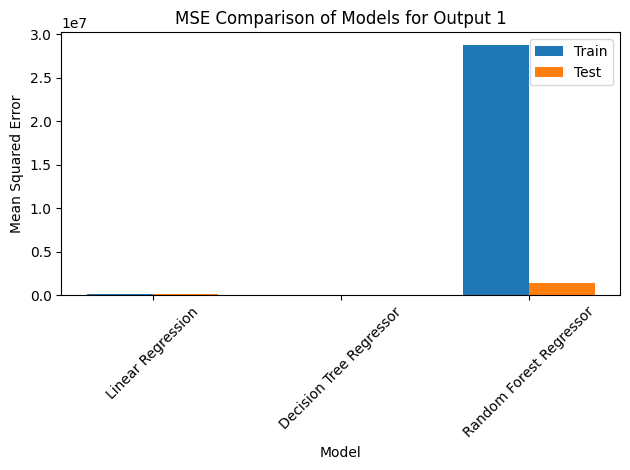

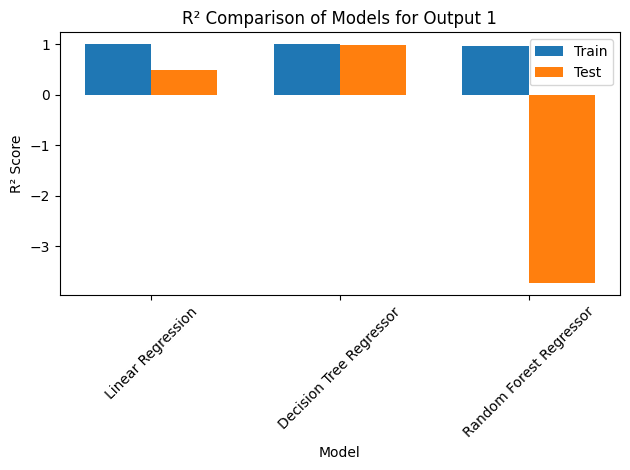

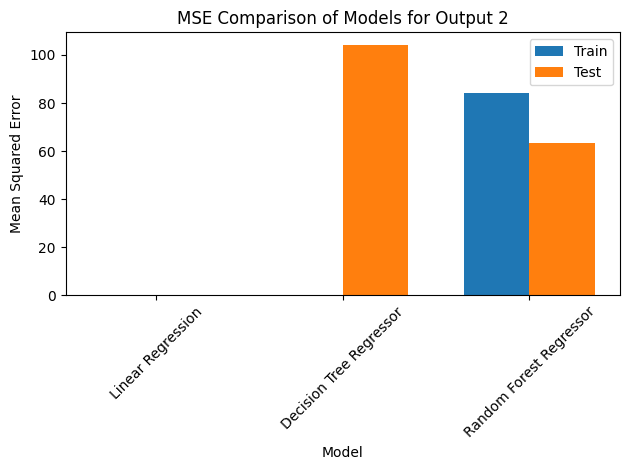

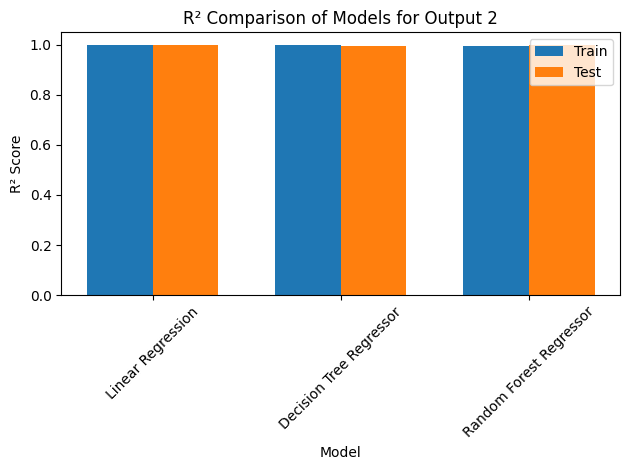

In [20]:
# Plotting MSE and R^2 comparisons for each output
for i in range(Y_train.shape[1]):  # Loop through each output
    plot_comparison_multioutput('MSE', 'MSE Comparison of Models', 'Mean Squared Error', i)
    plot_comparison_multioutput('R^2', 'R² Comparison of Models', 'R² Score', i)


In [22]:
X_test

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Current(A),Time at 4.15V (s),Time constant current (s)
69,71,2173.44,793.000000,4.008,3.398,4947.551,5912.35
29,31,2229.16,849.594000,4.045,3.377,5104.359,6077.38
471,493,1617.12,466.714286,3.945,3.542,3140.234,4040.23
344,347,1849.16,581.000000,3.975,3.492,3896.250,4796.25
54,56,2194.12,811.219000,4.044,3.387,4985.344,5958.34
...,...,...,...,...,...,...,...
460,482,1635.81,474.428571,3.947,3.540,3206.321,4076.32
152,155,2052.81,711.600000,3.998,3.434,4558.743,5516.34
154,157,2050.28,712.000000,3.998,3.435,4550.406,5516.41
56,58,2190.75,811.218000,4.044,3.387,4978.313,5951.31


In [24]:
out=dt_model.predict([[7.0,3301.18,1194.2350769230688,3.674,3.504,5023.6336363636365,5977.38]])[0]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [34]:
print(f"Approximate Charging Time  :  {out[0]} \nApproximate RUL            :  {out[1]}")


Approximate Charging Time  :  5977.38 
Approximate RUL            :  1106.0


In [35]:
data.columns

Index(['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)',
       'Max. Voltage Dischar. (V)', 'Current(A)', 'Time at 4.15V (s)',
       'Time constant current (s)', 'Charging time (s)', 'RUL'],
      dtype='object')

In [38]:
import pickle
with open('dt.pkl', 'wb') as file:
   pickle.dump(dt_model,file)

In [40]:
v1 = input('enter Cycle_Index:')
v2 = input('enter Discharge Time (s):')
v3 = input('enter Decrement 3.6-3.4V (s):')
v4 = input('enter Max. Voltage Dischar. (V):')
v5 = input('enter Min. Voltage Charg. (V):')
v6 = input('enter Time at 4.15V (s)')
v7= input('enter Time constant current (s)')

out_1 = dt_model.predict([[float(v1),
       float(v2),
       float(v3),
       float(v4),
       float(v5),
       float(v6),
       float(v7)]])[0]
charge_time=out_1[0]//60
rull=out_1[1]/365
# print(charge_time)
print(f'\n\nApproximate Charging Time:{charge_time:.2f}')
print(f'\n\nApproximate RUL:{rull:.2f}')


enter Cycle_Index:3
enter Discharge Time (s):4
enter Decrement 3.6-3.4V (s):5
enter Max. Voltage Dischar. (V):6
enter Min. Voltage Charg. (V):7
enter Time at 4.15V (s)8
enter Time constant current (s)9


Approximate Charging Time:99.00


Approximate RUL:3.01


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [41]:
data.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Current(A),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107
